# DIABETES PROJECT

## importing libraries

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### loading the csv file

In [189]:
dat=pd.read_csv(r'C:\Users\HP 440 G3\Downloads\diabetes.csv')

In [190]:
dat.head(15)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1

## Data cleaning

In [191]:
dat.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [192]:
dat.duplicated().sum()

0

In [193]:
dat

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

## Visualising the data 

<Axes: xlabel='Insulin', ylabel='Density'>

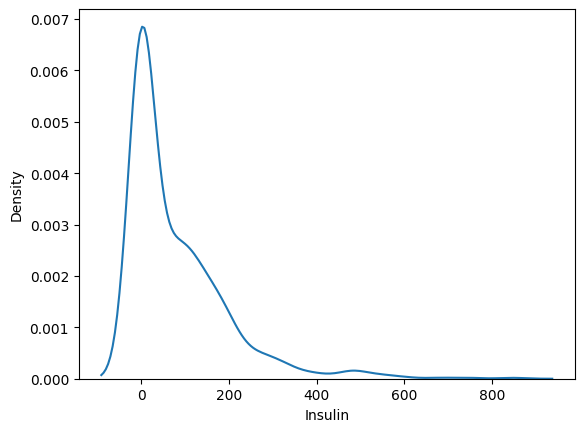

In [194]:
sns.kdeplot(dat["Insulin"])

In [195]:
sns.kdeplot(dat['BMI'])

<Axes: xlabel='BMI', ylabel='Density'>

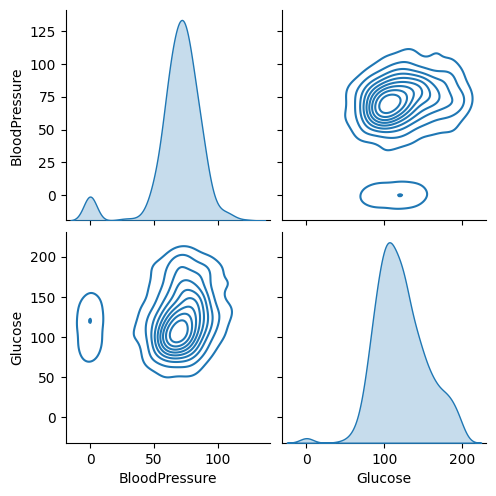

In [196]:
sns.pairplot(dat[['BloodPressure','Glucose']],kind='kde')

<Axes: ylabel='Insulin'>

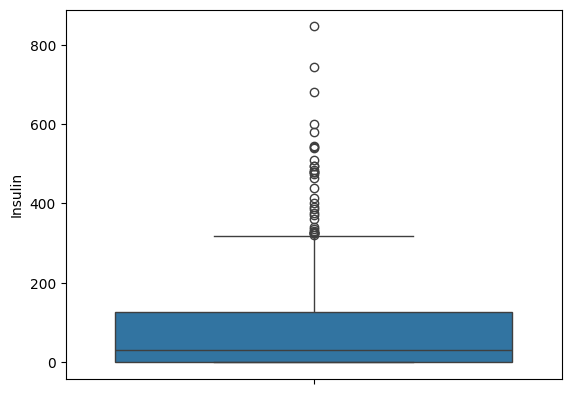

In [197]:
sns.boxplot(dat['Insulin'])

<Axes: ylabel='BloodPressure'>

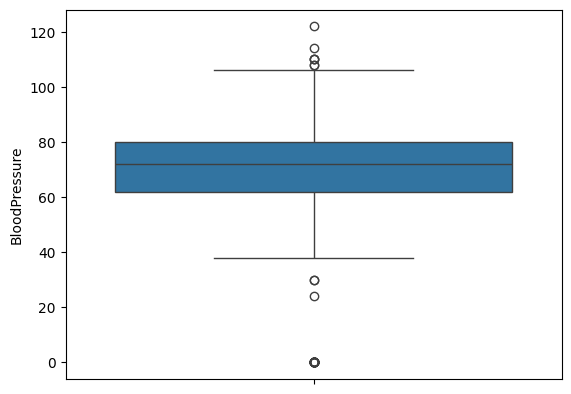

In [198]:
sns.boxplot(dat['BloodPressure'])

<Axes: ylabel='BMI'>

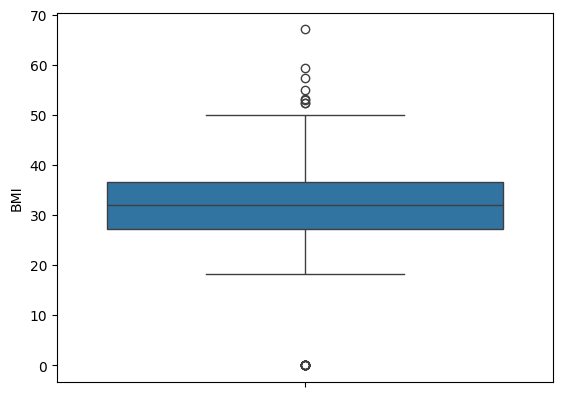

In [199]:
sns.boxplot(dat['BMI'])

## SCALING THE DATA


In [200]:
from sklearn.preprocessing import MinMaxScaler

In [201]:
scaler_obj=MinMaxScaler()
sc=scaler_obj.fit(dat)
scaled_data=sc.transform(dat)

In [202]:
data=pd.DataFrame(scaled_data)

In [203]:
data

0         1         2         3         4         5         6  \
0    0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1    0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2    0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3    0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002   
4    0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638   
..        ...       ...       ...       ...       ...       ...       ...   
763  0.588235  0.507538  0.622951  0.484848  0.212766  0.490313  0.039710   
764  0.117647  0.613065  0.573770  0.272727  0.000000  0.548435  0.111870   
765  0.294118  0.608040  0.590164  0.232323  0.132388  0.390462  0.071307   
766  0.058824  0.633166  0.491803  0.000000  0.000000  0.448584  0.115713   
767  0.058824  0.467337  0.573770  0.313131  0.000000  0.453055  0.101196   

            7    8  
0    0.483333  1.0  
1    0.166667  0.0  
2    0.183333  1.0  
3    0.000000  0.0  
4    0.200000  1.0  
..        ...  ...  
763  0.700000  0.0  
764  0.100000  0.0  
765  0.150000  0.0  
766  0.433333  1.0  
767  0.033333  0.0  

[768 rows x 9 columns]

Text(0.5, 0, 'BMI')

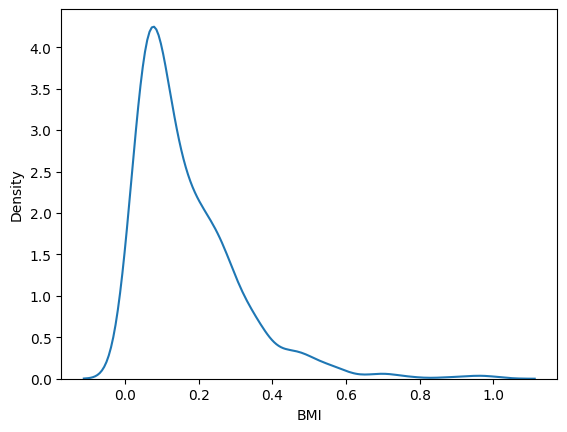

In [204]:
sns.kdeplot(data[6])
plt.xlabel('BMI')

In [205]:
sns.kdeplot(data[5])
plt.xlabel('Insulin')

Text(0.5, 0, 'Insulin')

### Seperating the independent data variables and dependent variables 

In [206]:
x=data.drop(columns=8)

In [207]:
x

0         1         2         3         4         5         6  \
0    0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1    0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2    0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3    0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002   
4    0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638   
..        ...       ...       ...       ...       ...       ...       ...   
763  0.588235  0.507538  0.622951  0.484848  0.212766  0.490313  0.039710   
764  0.117647  0.613065  0.573770  0.272727  0.000000  0.548435  0.111870   
765  0.294118  0.608040  0.590164  0.232323  0.132388  0.390462  0.071307   
766  0.058824  0.633166  0.491803  0.000000  0.000000  0.448584  0.115713   
767  0.058824  0.467337  0.573770  0.313131  0.000000  0.453055  0.101196   

            7  
0    0.483333  
1    0.166667  
2    0.183333  
3    0.000000  
4    0.200000  
..        ...  
763  0.700000  
764  0.100000  
765  0.150000  
766  0.433333  
767  0.033333  

[768 rows x 8 columns]

In [208]:
y=data[8]

In [209]:
y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: 8, Length: 768, dtype: float64

### Splitting the data for training and testing purposes

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [212]:
x_train.shape

(537, 8)

In [213]:
y_train.shape

(537,)

In [214]:
x_test.shape

(231, 8)

In [215]:
y_test.shape

(231,)

## importing logistic regression algo for training the model

In [216]:
from sklearn.linear_model import LogisticRegression

In [217]:
obj=LogisticRegression()

In [218]:
obj.fit(x_train,y_train)

LogisticRegression()

### Checking the accuracy

In [219]:
from sklearn.metrics import accuracy_score

In [220]:
training_score=obj.score(x_train,y_train)
testing_score=obj.score(x_test,y_test)


In [221]:
print(training_score*100)
print(testing_score*100)

77.28119180633148
79.22077922077922


### Prediction

In [222]:
predictions=obj.predict(x_test)

In [223]:
test_accuracy=accuracy_score(y_test,predictions)

In [224]:
test_accuracy

0.7922077922077922

In [225]:
comparision =pd.DataFrame(y_test)

In [226]:
comparision # actual outcomes 

8
724  0.0
431  0.0
513  0.0
594  0.0
100  1.0
..   ...
304  0.0
199  1.0
569  1.0
136  0.0
178  0.0

[231 rows x 1 columns]

### comparing the predicted values with actual values

In [227]:
comparision['predicted_values']=predictions

In [228]:
comparision

8  predicted_values
724  0.0               0.0
431  0.0               0.0
513  0.0               0.0
594  0.0               0.0
100  1.0               1.0
..   ...               ...
304  0.0               0.0
199  1.0               0.0
569  1.0               0.0
136  0.0               0.0
178  0.0               1.0

[231 rows x 2 columns]

In [229]:
y_test.head(10)

724    0.0
431    0.0
513    0.0
594    0.0
100    1.0
599    0.0
666    1.0
676    1.0
570    0.0
505    0.0
Name: 8, dtype: float64

### evaluating the model's training

In [230]:
from sklearn.metrics import confusion_matrix , classification_report

In [231]:
matrix=confusion_matrix(comparision[8],comparision['predicted_values'])

In [232]:
matrix

array([[139,   9],
       [ 39,  44]], dtype=int64)

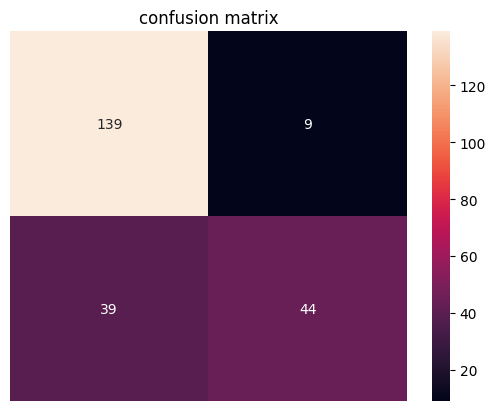

In [233]:

sns.heatmap(matrix,annot=True,fmt='d')  #fmt=which format we want and d specifies decimal
plt.title('confusion matrix')
plt.axis('off')
plt.show()

In [234]:
report=classification_report(comparision[8],comparision['predicted_values'])

In [235]:
print(report)

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85       148
         1.0       0.83      0.53      0.65        83

    accuracy                           0.79       231
   macro avg       0.81      0.73      0.75       231
weighted avg       0.80      0.79      0.78       231



## saving the logistic regression model


In [236]:
import os,joblib
os.makedirs('models',exist_ok=True)
joblib.dump(obj,'./models/logisticRegression.lb')

['./models/logisticRegression.lb']

## Training the model with Decision Tree

In [237]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [238]:
tree_obj=DecisionTreeClassifier() # object creation

In [239]:
tree_obj.fit(x_train,y_train)

DecisionTreeClassifier()

In [240]:
tree_training_score=tree_obj.score(x_train, y_train)
tree_test_score=tree_obj.score(x_test, y_test)

In [241]:
print(training_score*100)
print(testing_score*100) # it is leading to very high overfitting to solve this we gonna do hyperparameter tuning

77.28119180633148
79.22077922077922


## Hyperparameter Tuning

In [242]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [243]:
#parameters={'max_depth':[50,100,70],'min_samples_split':[80,100.150]}
#param_grid = {
    #'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    #'C': [0.01, 0.1, 1, 10, 100],
    #'solver': ['liblinear', 'saga', 'lbfgs'],
    #'max_iter': [100, 200, 300]
#}
#grid_obj=GridSearchCV(obj,param_grid,cv=5)

In [244]:
#grid_obj.fit(x_train,y_train)

In [245]:
#grid_obj.best_params_

In [246]:
#Gridtraining_score=grid_obj.score(x_train,y_train)
#Gridtesting_score=grid_obj.score(x_test,y_test)


In [247]:
#print(Gridtraining_score) 
#print(Gridtesting_score)

In [248]:
prediction2=tree_obj.predict(x_test)


In [249]:
comparision['treePredicted_values']= prediction2

In [250]:
comparision

8  predicted_values  treePredicted_values
724  0.0               0.0                   0.0
431  0.0               0.0                   0.0
513  0.0               0.0                   0.0
594  0.0               0.0                   1.0
100  1.0               1.0                   0.0
..   ...               ...                   ...
304  0.0               0.0                   1.0
199  1.0               0.0                   1.0
569  1.0               0.0                   0.0
136  0.0               0.0                   0.0
178  0.0               1.0                   1.0

[231 rows x 3 columns]

In [251]:
tree_matrix=confusion_matrix(comparision[8],comparision['treePredicted_values'])

In [252]:
tree_matrix

array([[114,  34],
       [ 37,  46]], dtype=int64)

In [253]:
tree_report=classification_report(comparision[8],comparision['treePredicted_values'])

In [254]:
print(tree_report)

              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76       148
         1.0       0.57      0.55      0.56        83

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Saving Decision tree model

In [255]:
import os,joblib
os.makedirs('models',exist_ok=True)
joblib.dump(tree_obj,'./models/decision_tree_obj.lb')



['./models/decision_tree_obj.lb']

## Training our data with Random Forest algo

In [256]:
from sklearn.ensemble import RandomForestClassifier

In [257]:
forest_obj=RandomForestClassifier() #obj creation

In [258]:
forest_obj.fit(x_train,y_train)

RandomForestClassifier()

In [259]:
print('training score:',forest_obj.score(x_train,y_train)*100)
print('testing score:',forest_obj.score(x_test,y_test)*100)


training score: 100.0
testing score: 73.59307359307358


It is also overfitted so we will apply hyperparameter tuning

In [260]:
param = {
    'n_estimators': [50, 100],  # fewer trees
    'max_depth': [10,12,19],  # shallower trees
    'min_samples_split': [25, 20, 12],  # larger splits
    'min_samples_leaf': [30, 26, 18],  # larger leaf nodes
   
}
grid_obj2=GridSearchCV(estimator=forest_obj,param_grid=param,cv=10)

In [261]:
grid_obj2.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 12, 19],
                         'min_samples_leaf': [30, 26, 18],
                         'min_samples_split': [25, 20, 12],
                         'n_estimators': [50, 100]})

In [262]:
grid_obj2.best_params_

{'max_depth': 12,
 'min_samples_leaf': 26,
 'min_samples_split': 12,
 'n_estimators': 50}

In [263]:
print('train score:',grid_obj2.score(x_train,y_train))
print('test score:',grid_obj2.score(x_test,y_test))

train score: 0.8026070763500931
test score: 0.7316017316017316


In [264]:
prediction3=grid_obj2.predict(x_test)

In [265]:
comparision['forestPredicted_values']= prediction3

In [266]:
comparision.head(10)

8  predicted_values  treePredicted_values  forestPredicted_values
724  0.0               0.0                   0.0                     0.0
431  0.0               0.0                   0.0                     0.0
513  0.0               0.0                   0.0                     0.0
594  0.0               0.0                   1.0                     1.0
100  1.0               1.0                   0.0                     1.0
599  0.0               0.0                   0.0                     0.0
666  1.0               1.0                   1.0                     1.0
676  1.0               1.0                   1.0                     0.0
570  0.0               0.0                   0.0                     0.0
505  0.0               0.0                   0.0                     0.0

In [267]:
forest_matrix=confusion_matrix(comparision[8],comparision['forestPredicted_values'])

In [268]:
forest_matrix

array([[125,  23],
       [ 39,  44]], dtype=int64)

In [269]:
forest_report=classification_report(comparision[8],comparision['forestPredicted_values'])

In [270]:
print(forest_report)

              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       148
         1.0       0.66      0.53      0.59        83

    accuracy                           0.73       231
   macro avg       0.71      0.69      0.69       231
weighted avg       0.72      0.73      0.72       231



## saving the random forest model

In [271]:
os.makedirs('models',exist_ok=True)
joblib.dump(forest_obj,'./models/randomforest_obj.lb')



['./models/randomforest_obj.lb']

## Comparing all the reports and metrices of diff. applied algorithms 

In [272]:
print(forest_matrix) # here true positve + true neg. values adds upto  178

[[125  23]
 [ 39  44]]


In [273]:
print(tree_matrix) # here true positve + true neg. values adds upto  180

[[114  34]
 [ 37  46]]


In [274]:
print(matrix) # here true positve + true neg. values adds upto 169

[[139   9]
 [ 39  44]]


In [275]:
print(forest_report)

              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       148
         1.0       0.66      0.53      0.59        83

    accuracy                           0.73       231
   macro avg       0.71      0.69      0.69       231
weighted avg       0.72      0.73      0.72       231



In [276]:
print(tree_report)

              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76       148
         1.0       0.57      0.55      0.56        83

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



In [277]:
print(report)

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85       148
         1.0       0.83      0.53      0.65        83

    accuracy                           0.79       231
   macro avg       0.81      0.73      0.75       231
weighted avg       0.80      0.79      0.78       231



In [278]:

import xgboost as xgb


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


model.fit(x_train, y_train)


y_pred = model.predict(x_test)





C:\Users\HP 440 G3\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [10:38:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [279]:
pd.DataFrame(y_pred)

0
0    1
1    0
2    0
3    0
4    0
..  ..
226  0
227  0
228  0
229  0
230  0

[231 rows x 1 columns]

In [280]:
comparision['xgpred']= y_pred

In [281]:
_report=classification_report(comparision[8],comparision['xgpred'])

In [282]:
print(_report)

              precision    recall  f1-score   support

         0.0       0.63      0.61      0.62       148
         1.0       0.34      0.36      0.35        83

    accuracy                           0.52       231
   macro avg       0.49      0.49      0.49       231
weighted avg       0.53      0.52      0.53       231



In [283]:
data

0         1         2         3         4         5         6  \
0    0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1    0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2    0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3    0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002   
4    0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638   
..        ...       ...       ...       ...       ...       ...       ...   
763  0.588235  0.507538  0.622951  0.484848  0.212766  0.490313  0.039710   
764  0.117647  0.613065  0.573770  0.272727  0.000000  0.548435  0.111870   
765  0.294118  0.608040  0.590164  0.232323  0.132388  0.390462  0.071307   
766  0.058824  0.633166  0.491803  0.000000  0.000000  0.448584  0.115713   
767  0.058824  0.467337  0.573770  0.313131  0.000000  0.453055  0.101196   

            7    8  
0    0.483333  1.0  
1    0.166667  0.0  
2    0.183333  1.0  
3    0.000000  0.0  
4    0.200000  1.0  
..        ...  ...  
763  0.700000  0.0  
764  0.100000  0.0  
765  0.150000  0.0  
766  0.433333  1.0  
767  0.033333  0.0  

[768 rows x 9 columns]

<Axes: >

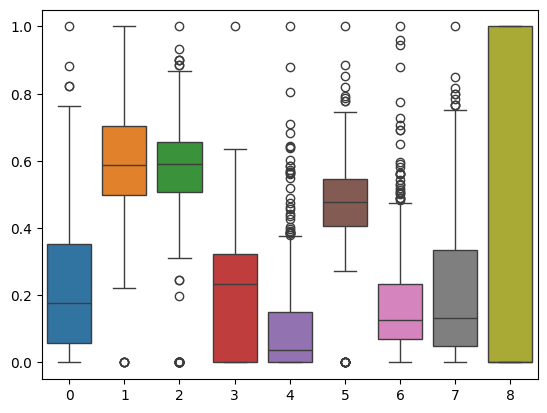

In [284]:
sns.boxplot(data)

## removing outliers

In [285]:
import pandas as pd



# Function to remove outliers based on IQR
def remove_outliers(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
       
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


data_no_outliers = remove_outliers(data)



In [286]:
print(data_no_outliers)

            0         1         2         3         4         5         6  \
0    0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1    0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2    0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3    0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002   
5    0.294118  0.582915  0.606557  0.000000  0.000000  0.381520  0.052519   
..        ...       ...       ...       ...       ...       ...       ...   
763  0.588235  0.507538  0.622951  0.484848  0.212766  0.490313  0.039710   
764  0.117647  0.613065  0.573770  0.272727  0.000000  0.548435  0.111870   
765  0.294118  0.608040  0.590164  0.232323  0.132388  0.390462  0.071307   
766  0.058824  0.633166  0.491803  0.000000  0.000000  0.448584  0.115713   
767  0.058824  0.467337  0.573770  0.313131  0.000000  0.453055  0.101196   

            7    8  
0    0.483333  1.0  
1    0.166667  0.0  
2    0.18333

In [287]:
datax=pd.DataFrame(data_no_outliers)

In [288]:
x=datax.drop([8],axis=1)

In [289]:
x

0         1         2         3         4         5         6  \
0    0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1    0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2    0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3    0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002   
5    0.294118  0.582915  0.606557  0.000000  0.000000  0.381520  0.052519   
..        ...       ...       ...       ...       ...       ...       ...   
763  0.588235  0.507538  0.622951  0.484848  0.212766  0.490313  0.039710   
764  0.117647  0.613065  0.573770  0.272727  0.000000  0.548435  0.111870   
765  0.294118  0.608040  0.590164  0.232323  0.132388  0.390462  0.071307   
766  0.058824  0.633166  0.491803  0.000000  0.000000  0.448584  0.115713   
767  0.058824  0.467337  0.573770  0.313131  0.000000  0.453055  0.101196   

            7  
0    0.483333  
1    0.166667  
2    0.183333  
3    0.000000  
5    0.150000  
..        ...  
763  0.700000  
764  0.100000  
765  0.150000  
766  0.433333  
767  0.033333  

[636 rows x 8 columns]

In [290]:
y=datax[8]

In [291]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [292]:
x_train.shape

(445, 8)

In [293]:
x_test.shape

(191, 8)

In [294]:
y.shape

(636,)

In [295]:
obj.fit(x_train,y_train)

LogisticRegression()

In [296]:
predic=obj.predict(x_test)

In [297]:
print(predic.shape)
print(y_test.shape)

(191,)
(191,)


In [298]:
comparision2=pd.DataFrame()

In [299]:
comparision2['actual'] = y_test

In [300]:
comparision2['log_predicted'] = predic

In [301]:
comparision2

actual  log_predicted
110     1.0            0.0
316     0.0            0.0
263     0.0            0.0
40      0.0            1.0
211     0.0            0.0
..      ...            ...
452     0.0            0.0
400     1.0            0.0
442     0.0            0.0
278     0.0            0.0
499     0.0            1.0

[191 rows x 2 columns]

In [302]:
log_matrix=confusion_matrix(comparision2['actual' ],comparision2['log_predicted'])

In [303]:
log_matrix

array([[123,  10],
       [ 24,  34]], dtype=int64)

In [304]:
log_report=matrix=classification_report(comparision2['actual' ],comparision2['log_predicted'])

In [305]:
print(log_report)

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       133
         1.0       0.77      0.59      0.67        58

    accuracy                           0.82       191
   macro avg       0.80      0.76      0.77       191
weighted avg       0.82      0.82      0.81       191



In [306]:
tree_obj.fit(x_train,y_train)

DecisionTreeClassifier()

In [307]:
tree_predicted=tree_obj.predict(x_test)

In [308]:
comparision2['tree_predictions']=tree_predicted

In [309]:
tre_matrix=confusion_matrix(comparision2['actual' ],comparision2['tree_predictions'])

In [310]:
tre_matrix

array([[103,  30],
       [ 21,  37]], dtype=int64)

In [311]:
tre_report=classification_report(comparision2['actual' ],comparision2['tree_predictions'])

In [312]:
print(tre_report)

              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80       133
         1.0       0.55      0.64      0.59        58

    accuracy                           0.73       191
   macro avg       0.69      0.71      0.70       191
weighted avg       0.75      0.73      0.74       191



In [342]:
forest_obj.fit(x_train,y_train)

RandomForestClassifier()

In [343]:
forest_predicted=forest_obj.predict(x_test)

In [344]:
comparision2['forest_predictions']=forest_predicted

In [345]:
for_matrix=confusion_matrix(comparision2['actual' ],comparision2['forest_predictions'])

In [346]:
for_matrix

array([[114,  19],
       [ 19,  39]], dtype=int64)

In [347]:
for_report=classification_report(comparision2['actual' ],comparision2['forest_predictions'])

In [348]:
print(for_report)

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       133
         1.0       0.67      0.67      0.67        58

    accuracy                           0.80       191
   macro avg       0.76      0.76      0.76       191
weighted avg       0.80      0.80      0.80       191



# comparision

In [349]:
comparision2

actual  log_predicted  tree_predictions  forest_predictions
110     1.0            0.0               1.0                 1.0
316     0.0            0.0               0.0                 0.0
263     0.0            0.0               0.0                 0.0
40      0.0            1.0               1.0                 1.0
211     0.0            0.0               1.0                 0.0
..      ...            ...               ...                 ...
452     0.0            0.0               0.0                 0.0
400     1.0            0.0               0.0                 0.0
442     0.0            0.0               0.0                 0.0
278     0.0            0.0               0.0                 0.0
499     0.0            1.0               1.0                 1.0

[191 rows x 4 columns]

In [351]:
log_test_accuracy=accuracy_score(y_test,predic)

In [352]:
log_test_accuracy

0.8219895287958116

In [350]:
tree_test_accuracy=accuracy_score(y_test,tree_predicted)

In [353]:
tree_test_accuracy

0.7329842931937173

In [354]:
for_test_accuracy=accuracy_score(y_test,forest_predicted)

In [355]:
for_test_accuracy

0.8010471204188482

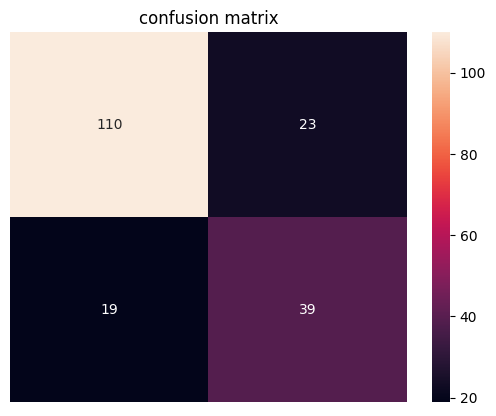

In [356]:
sns.heatmap(log_matrix,annot=True,fmt='d')  #fmt=which format we want and d specifies decimal
plt.title('confusion matrix')
plt.axis('off')
plt.show()

In [357]:
sns.heatmap(for_matrix,annot=True,fmt='d')  #fmt=which format we want and d specifies decimal
plt.title('confusion matrix')
plt.axis('off')
plt.show()


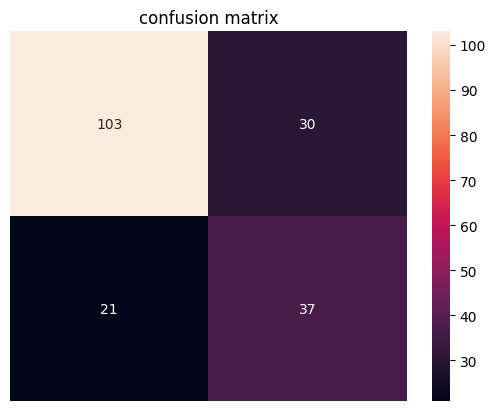

In [358]:
sns.heatmap(tre_matrix,annot=True,fmt='d')  #fmt=which format we want and d specifies decimal
plt.title('confusion matrix')
plt.axis('off')
plt.show()

#### after comparing all the algo accuracy logistic regression gives the best predictions